In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## 정규분포
정규분포(normal distribution)는 통계분석에서 매우 자주 사용되는 중요한 확률분포로, 자연계에서 일어나는 수많은 현상을 표현할 수 있다

가우스 푼포(Gaussian distribution)라고도 부른다.

정규분포가 취할 수 있는 값은 실수 전체로, 파라미터는 $\mu$ (평균), $\sigma^{2}$ (분산) 두 가지이다.

여기서는 정규분포를 $N(\mu,\sigma^{2})$ 로 표기한다

### 정규분포의 밀도함수
$$f(x) = \frac{1}{\sqrt{2\pi\sigma}} exp \{-\frac{(x-\mu)^{2}}{2\sigma^{2}} \} (-\infty < x < \infty)$$

### 남자 고등학생의 키
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만남 남자 고등학생의 키는 $N(170,5^{2}$ 를 따른다

우연히 만남 남자 고등학생의 키가 165cm 이상 175cm 이하일 확률은

$$P(165 \leq X \leq 175) = \int_{165}^{175} \frac{1}{\sqrt{2\pi * 5}} exp \{-\frac{(x-170)^{2}}{2*5^{2}} \}dx \simeq 0.683$$

### 정규분포의 기댓값과 분산
$X ~ N(\mu,\sigma^{2})$ 이라고 할 때
$$E(X) = \mu, V(X) = \sigma^{2}$$

정규분포에는 다른 확률 분포에는 없는 매우 중요한 성질이 있다

정규분포를 따르는 확률변수 X를 aX+b와 같이 변환한 경우, 변환한 확률분포도 정규분포를 따른다는 것이다

### 정규분포의 변환
$X ~ N(\mu,\sigma^{2})$ 이라고 할 때, 임의의 실수 a,b에 대해서
$$ aX + b \thicksim N(a\mu + b,a^{2}\sigma^{2})$$
이 성립힌다

이 성질을 이용함으로써 $X \thicksim N(\mu,\sigma^{2})$ 를 정규화한 확률변수 $Z = \frac{X-\mu}{\sigma}$는 $N(0,1)$을 따른다

표준화한 정규분포 $N(0,1)$을 표준정규분포(standrad normal distribution)라고 부른다

In [3]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

$N(2,0.5^{2})$를 따르는 확률변수 X

In [4]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
check_prob(X)

expected vaue 2.000
variance 0.250


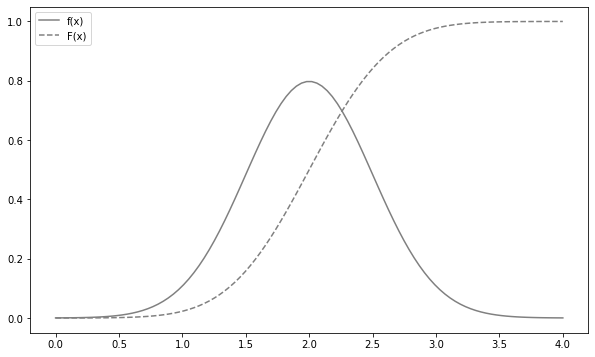

In [6]:
plot_prob(X,0,4)

scipy.stats를 사용하여 구현해 보자

정규분포를 따르는 확률변수는 norm 함수를 사용한다

첫번째 인수에 기댓값 $\mu$ , 두번째 인수에 표준편차 $\sigma$ 를 각각 지정한다

기본 설정값이 0,1 이므로, 아무것도 지정하지 않으면 표준정규분포를 따르는 확률변수가 생성됨

In [7]:
rv = stats.norm(2, 0.5)

In [8]:
rv.mean(), rv.var()

(2.0, 0.25)

밀도함수는 pdf 메서드로 계산

In [9]:
rv.pdf(2)

0.7978845608028654

분포함수는 cdf 메서드로 계산할 수 있다

In [10]:
rv.cdf(1.7)

0.27425311775007355

isf 메서드를 사용하면 상위 $100\alpha%$ 점을 구할 수 있다

상위 $100\alpha%$ 점이란 $P(X \geq x) = \alpha$ 를 만족하는 x이다

이를 $z_{\alpha}$ 라고 하겠다

또한 표준정규분포는 x = 0을 중심으로 대칭인 형태를 띠고 있기 때문에 $z_{1-\alpha} = -z_{\alpha}$ 가 성립

In [11]:
rv.isf(0.3)

2.2622002563540207

interval 메서드로 확률이 $\alpha$ 가 되는 가운데 부분의 구간을 구할 수 있다

In [12]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

위의 식은 아래와 같다

In [13]:
rv.isf(0.95),rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

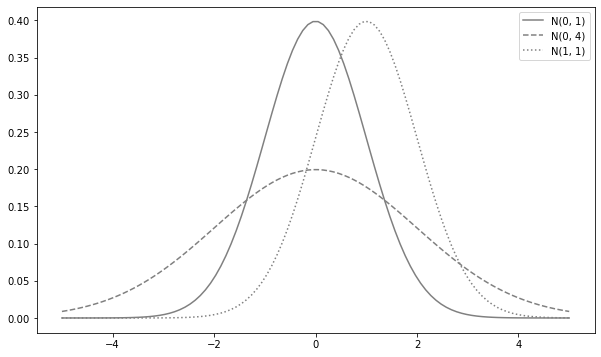

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

$\sigma^{2}$ 이 커짐에 따라 분포가 넓어지고, $\mu$ 가 변화하면 분포 전체가 평행이동 한다

## 지수분포

지수분포(exponential distribution)는 어떤 사건이 발생하는 간격이 따르는 분포이다

간격이라는 시간이 따르는 분포이므로, 확률변수가 취할 수 있는 값은 0 이상의 실수이다

지수분포의 파라미터는 $\lambda$ 로, 양의 실수이다

앞으로 지수분포를 $Ex(\lambda)$ 로 하겠다

### 지수분포의 밀도함수
$$f(x) = \begin{cases} \lambda e^{-\lambda x} & (x \geq 0) \\ 0 & (otherwise) \end{cases}$$

$Ex(\lambda)$ 는 단위시간당 평균 $\lambda$ 번 발생하는 사건의 발생 간격을 따르는 확률분포이다

### 하루당 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 간격

교통사고를 완전한 임의의 사건으로 인식하면, 교통하고의 발생 간격, 즉 교통사고가 일어난 뒤 다음 교통사고가 일어날 때까지의 시간은 $Ex(2)$ 를 따른다고 할 수 있다

그러므로 이 지역에서 교통사고가 일어난 뒤 3일 이내에 또 교통사고가 일어날 확률은

$$P(X \leq 3) = \int_{0}^{3} 2e^{-2x} dx \simeq 0.998$$

지수분포는 포아송 분포와 관련성이 강한 확률분포이다

왜냐하면 단위시간당 평균 $\lambda$ 번 발생하는 사건에 대해서 단위시간당 사건이 발생하는 횟수가 따르는 것이 $Poi(\lambda)$ 가 되고, 사건의 발생 간격이 따르는 것이 $Ex(\lambda)$ 가 되기 때문이다

### 지수분포의 기댓값과 분산
$X \thicksim Ex(\lambda)$ 라고 할 때
$$E(X) = \frac{1}{\lambda}V(X) = \frac{1}{\lambda^{2}}$$

In [15]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

$Ex(3)$ 을 따르는 확률변수 X

In [16]:
lam = 3
X = Ex(lam)

In [17]:
check_prob(X)

expected vaue 0.333
variance 0.111


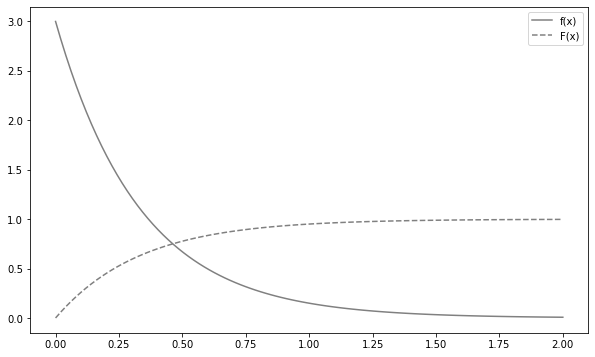

In [18]:
plot_prob(X,0,2)

scipy.stats에서는 지수분포를 따르는 확률변수를 expon함수로 작성할 수 있다

다만 파라미터 $\lambda$ 는 인수 scale에 $\frac{1}{\lambda}$ 형식으로 입력해야한다

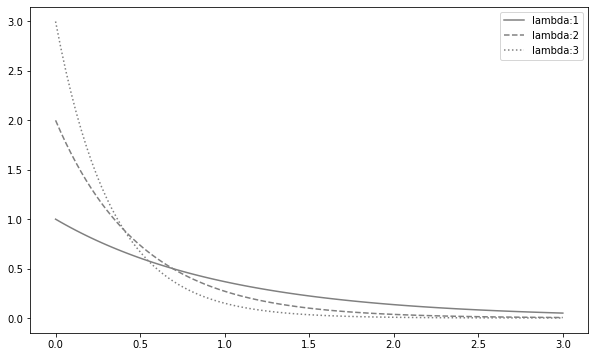

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 카이제곱분포

카이제곱분포, t 분포, F 분포는 추정과 검정에 사용하는 특수한 확률분포이다

이러한 분포에 대해서는 '어떠한 사건이 따른다' 라고 하지 않고 '어떠한 형태를 하고 있다' 라고 설명한다

또는 정규분포와 어떤 관련성을 맺고 있는지에 중점을 두어 설명한다

카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다

카이제곱분포는 서로 독립인 복수의 표준정규분포에 의해 다음과 같이 정의된다

$Z_{1},Z_{2},...,Z_{n}$이 독립이고 N(0, 1)을 따르고 있을 때, 그 제곱합

$$Y = \sum_{i=1}^{n} Z_{i}^{2}$$

의 확률 분포를 자유도가 n인 카이제곱분포라고 한다

표준정규분포로 카이제곱분포를 만들어보자

표본크기 10으로 무작위 추출하여 그 제곱합을 취하는 작업을 100만번 수행한다

그러면 $\sum_{i=1}^{10} Z_{i}^{2}$ 에서 무작위 추출한 표본 크기 100만의 표본 데이터를 얻을 수 있다

In [20]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

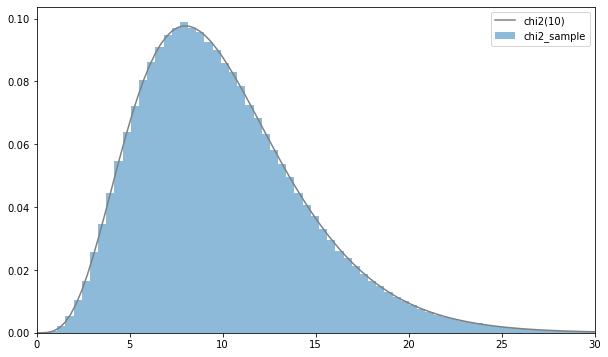

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

임의로 만든 카이제곱분포에서| 뽑은 100개의 히스토그램과 stats.chi2에서 만든 카이제곱분포의 밀도함수를 비교해 보면  정확하게 일치하는 것을 알 수 있다

카이제곱분포가 자유도n에 따라 어떠한 분포 형태가 되는지 살펴보자

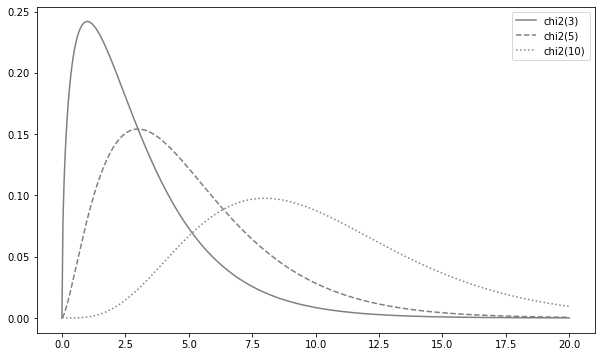

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

### 카이제곱분포의 특징

- 좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어짐
- 자유도가 커지면 자우대칭에 가까워짐
- 자유도의 값 가까이에 분포의 정점이 있다